In [1]:
from os import path
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from sklearn.metrics import confusion_matrix

In [2]:
top_df = pd.read_csv('./dataframes/top_posts.csv')

In [3]:
hot_df = pd.read_csv('./dataframes/hot_posts.csv')

In [4]:
top_df.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
hot_df.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
hot_df.head()

,score,subreddit,title,url
0,29112,/r/worldnews,North Korea has demanded the removal of US Sec...,https://www.bbc.co.uk/news/world-asia-47971164
1,2677,/r/worldnews,"READ: The Full Mueller Report, With Redactions",https://www.npr.org/2019/04/18/708850903/read-...
2,5658,/r/worldnews,Mueller report: Barr accused of helping Donald...,https://www.bbc.com/news/world-us-canada-47974261
3,2018,/r/worldnews,Trump 'tried to fire Mueller',https://www.bbc.co.uk/news/world-us-canada-479...
4,10314,/r/worldnews,Facebook Inc said on Wednesday it may have “un...,https://www.reuters.com/article/us-facebook-pr...


In [7]:
top_df.shape 

(1992, 4)

In [8]:
hot_df.shape #/r/worldnews, oddly, only has ~600 hot posts active, which would seem counterintuitive because /r/worldnews

(1567, 4)

In [22]:
top_df['title'].dtypes

dtype('O')

In [9]:
X = top_df['title']

In [10]:
y = top_df['subreddit']

In [11]:
tokenizer = RegexpTokenizer(r'\w+')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)



Multinomial Naive Bayes Model

In [13]:
cv = CountVectorizer(max_features = 1900, stop_words = stopwords.words('english'))

In [14]:
X_traincv = cv.fit_transform(X_train)
X_testcv = cv.transform(X_test)

In [15]:
X_traincv.shape

(1494, 1900)

In [16]:
mnb = MultinomialNB()

In [17]:
model = mnb.fit(X_traincv, y_train)

In [18]:
predictions = model.predict(X_testcv)

In [19]:
model.score(X_traincv, y_train) #Accuracy of the model succeeded on it's training data

0.9457831325301205

In [20]:
model.score(X_testcv, y_test) #Accuracy of the model generalizing to it's testing data

0.8674698795180723

In [21]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [86]:
confusion_matrix(y_test, predictions)

array([[225,  24],
       [ 42, 207]])

In [87]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 225
False Positives: 24
False Negatives: 42
True Positives: 207


In [88]:
accuracy_mnb = (tn + tp)/(tn + tp + fp + fn)

In [89]:
accuracy_mnb

0.8674698795180723

Logistic Regression Model 

In [138]:
cv = CountVectorizer(max_features=1690, stop_words = stopwords.words('english'))

In [139]:
X_traincv = cv.fit_transform(X_train)
X_testcv = cv.transform(X_test)

In [140]:
X_traincv.shape

(1494, 1690)

In [141]:
lr = LogisticRegression()

In [142]:
model = lr.fit(X_traincv, y_train)

In [143]:
predictions = model.predict(X_testcv)

In [144]:
model.score(X_traincv, y_train)

0.9879518072289156

In [145]:
model.score(X_testcv, y_test)

0.8333333333333334

In [150]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [151]:
confusion_matrix(y_test, predictions)

array([[200,  49],
       [ 34, 215]])

In [152]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 200
False Positives: 49
False Negatives: 34
True Positives: 215


## accuracy_lr = (tn + tp)/(tn + tp + fp + fn)

In [116]:
accuracy_lr

0.8654618473895582

In [36]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [47]:
top_df_string = ''
for t in top_df['title']:
    top_df_string+=t

In [48]:
hot_df_string = ''
for t in hot_df['title']:
    hot_df_string+=t

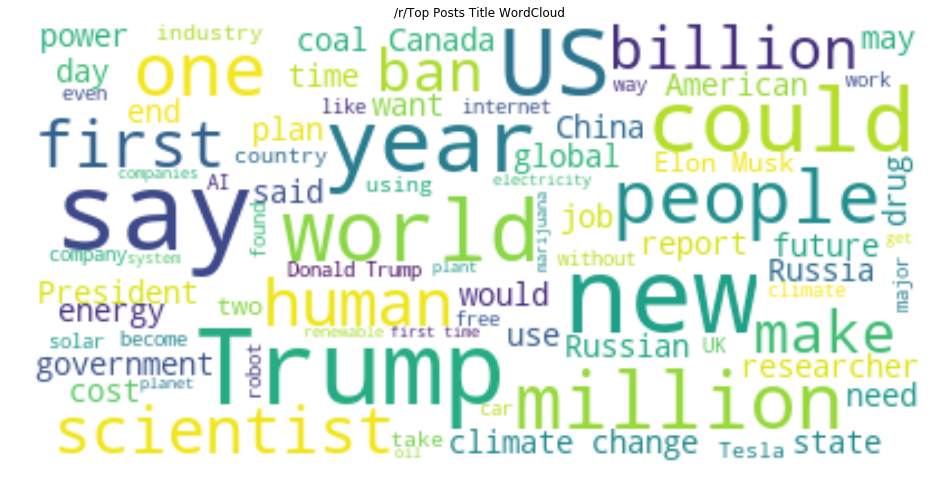

In [49]:
wordcloud = WordCloud(stopwords = stopwords.words('english'), max_font_size=50, max_words=80, background_color="white").generate(top_df_string)

plt.figure(figsize = (16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("/r/Top Posts Title WordCloud")

plt.show()

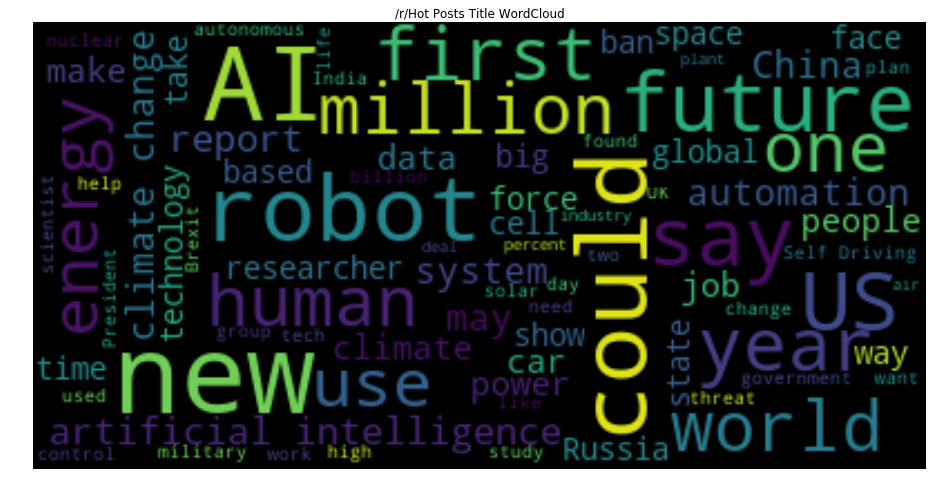

In [51]:
wordcloud = WordCloud(stopwords = stopwords.words('english'), max_font_size=50, max_words=80).generate(hot_df_string)

plt.figure(figsize = (16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("/r/Hot Posts Title WordCloud")

plt.show()